<a href="https://colab.research.google.com/github/SanjaySaatyaki/fast_ai_try_out/blob/main/03_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


Average Pixel Values

In [10]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

<Axes: >

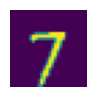

In [11]:
show_image(seven_tensors[5])

In [12]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [13]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

<Axes: >

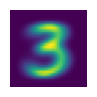

In [14]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

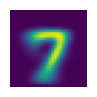

In [15]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

<Axes: >

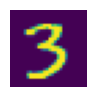

In [16]:
a_3 = stacked_threes[1]
show_image(a_3)

In [17]:
dist_3 = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [18]:
dist_7 = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [19]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [20]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [21]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
valid_3 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3 = valid_3.float() / 255

In [24]:
valid_7 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7 = valid_7.float() / 255

In [25]:
valid_3.shape, valid_7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [26]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In PyTorch, negative indices count backwards from the last dimension. So, `(-1,-2)` refers to the last two dimensions of the tensor. In this case, we are calculating the mean of the absolute differences over the height and width of the images (the last two dimensions of the image tensors).

In [27]:
valid_3_dist = mnist_distance(valid_3, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1102, 0.1289, 0.1403,  ..., 0.1301, 0.1132, 0.1079]),
 torch.Size([1010]))

In [28]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [29]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [30]:
accuracy_3s =      is_3(valid_3).float() .mean()
accuracy_7s = (1 - is_3(valid_7).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [31]:
def f(x): return x**2

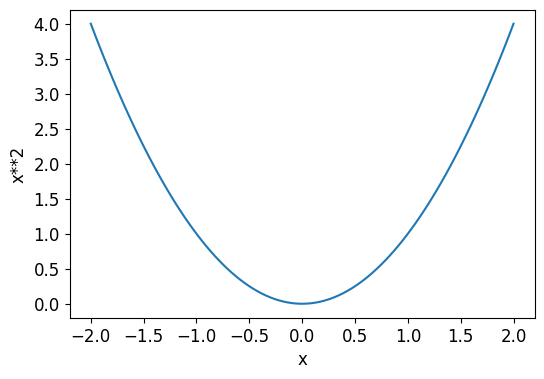

In [32]:
plot_function(f, 'x', 'x**2')

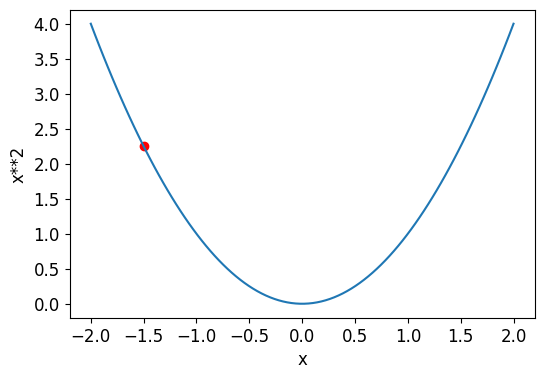

In [33]:
plot_function(f,'x','x**2')
plt.scatter(-1.5, f(-1.5), color="red")

In [34]:
xt = tensor(3.).requires_grad_()

In [35]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [36]:
yt.backward()

In [37]:
xt.grad

tensor(6.)

In [38]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [39]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [40]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [41]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

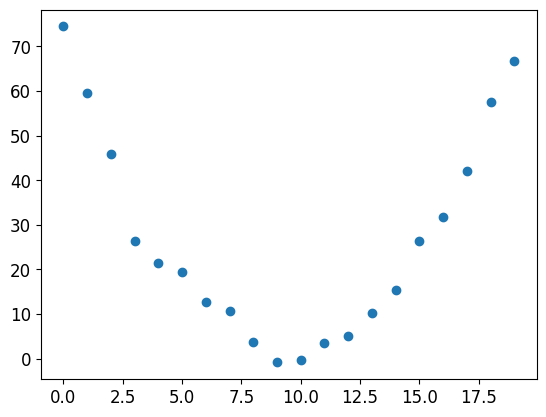

In [42]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [43]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [44]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [45]:
params = torch.randn(3).requires_grad_()

In [46]:
preds = f(time, params)

In [47]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

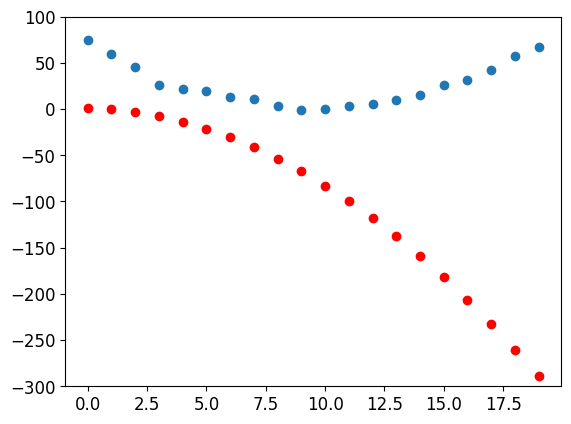

In [48]:
show_preds(preds)

In [49]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [50]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [51]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [52]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [53]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [54]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

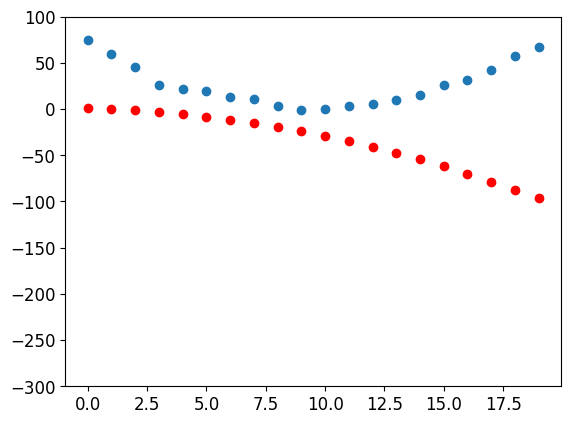

In [55]:
show_preds(preds)

In [56]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [57]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


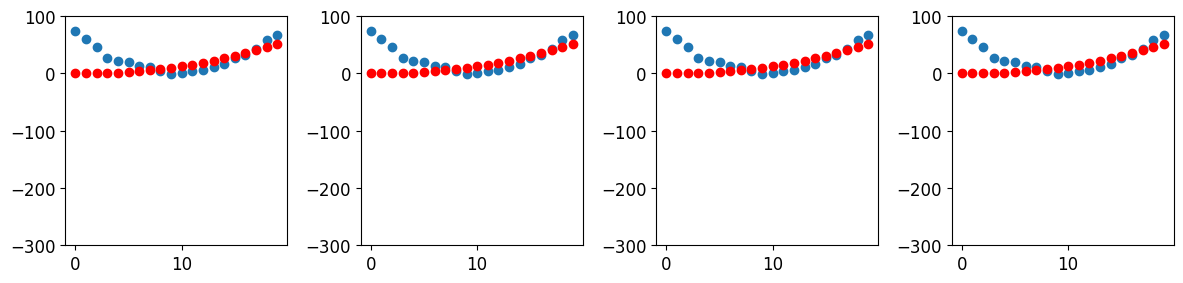

In [58]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [65]:
stacked_threes.shape, stacked_sevens.shape
stacked_threes.shape[0] +stacked_sevens.shape[0]

12396

In [67]:
torch.cat([stacked_threes, stacked_sevens]).shape

torch.Size([12396, 28, 28])

In [59]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [60]:
train_x.shape

torch.Size([12396, 784])

In [61]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [70]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [71]:
valid_x = torch.cat([valid_3, valid_7]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3) + [0]*len(valid_7)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [72]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [73]:
weights = init_params((28*28,1))

In [74]:
weights.shape

torch.Size([784, 1])

In [75]:
bias = init_params(1)

In [76]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [77]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [78]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [79]:
corrects.float().mean().item()

0.4912068545818329

In [80]:
with torch.no_grad(): weights[0] *= 1.0001

In [81]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329